# Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset


In [ ]:
dataset = pd.read_csv('Data.csv')
df = dataset.iloc[:, :-1]
print(df)

   Country   Age   Salary
0   France  44.0  72000.0
1    Spain  27.0  48000.0
2  Germany  30.0  54000.0
3    Spain  38.0  61000.0
4  Germany  40.0      NaN
5   France  35.0  58000.0
6    Spain   NaN  52000.0
7   France  48.0  79000.0
8  Germany  50.0  83000.0
9   France  37.0  67000.0


Duplicate entries



In [ ]:
print('number',df.duplicated().sum())
print(np.where(df.duplicated()==True))

number 0
(array([], dtype=int64),)


df.drop_duplicates(subset=None, keep=’first’, inplace=False)
subset: Subset takes a column or list of column label. It’s default value is none.
After passing columns, it will consider them only for duplicates

keep: keep is to control how to consider duplicate value. It has only three distinct value and default is ‘first’.
If ‘first’, it considers first value as unique and rest of the same values as duplicate.
If ‘last’, it considers last value as unique and rest of the same values as duplicate.
If False, it consider all of the same values as duplicates

data.drop_duplicates(subset ="Col Name", 
                     keep = False, inplace = True)

# Taking care of missing data


In [ ]:
df.isna()

,Country,Age,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,True
5,False,False,False
6,False,True,False
7,False,False,False
8,False,False,False
9,False,False,False


In [ ]:
df.isna().sum()

Country    0
Age        1
Salary     1
dtype: int64

In [ ]:
#Drop rows with missing values
dropdf=df.dropna()
dropdf.isna().sum()


Country    0
Age        0
Salary     0
dtype: int64

In [ ]:
print(df.shape)
print(dropdf.shape)

(10, 3)
(8, 3)


In [ ]:
#fill in missing values with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df.iloc[:, 1:3])
df.iloc[:, 1:3] = imputer.transform(df.iloc[:, 1:3])
print(df)


   Country        Age        Salary
0   France  44.000000  72000.000000
1    Spain  27.000000  48000.000000
2  Germany  30.000000  54000.000000
3    Spain  38.000000  61000.000000
4  Germany  40.000000  63777.777778
5   France  35.000000  58000.000000
6    Spain  38.777778  52000.000000
7   France  48.000000  79000.000000
8  Germany  50.000000  83000.000000
9   France  37.000000  67000.000000


# Encoding categorical data
Encoding the Independent Variable


In [ ]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
l1.fit(df['Country'])
df.Country = l1.transform(df.Country)
print(df)


   Country        Age        Salary
0        0  44.000000  72000.000000
1        2  27.000000  48000.000000
2        1  30.000000  54000.000000
3        2  38.000000  61000.000000
4        1  40.000000  63777.777778
5        0  35.000000  58000.000000
6        2  38.777778  52000.000000
7        0  48.000000  79000.000000
8        1  50.000000  83000.000000
9        0  37.000000  67000.000000


In [ ]:
#One Hot Encoding
#2 ways
#1.DataFrame.get_dummies
df = dataset.iloc[:, :-1]
#print(df)
ddf=pd.get_dummies(data=df)
print(ddf)

    Age   Salary  Country_France  Country_Germany  Country_Spain
0  44.0  72000.0               1                0              0
1  27.0  48000.0               0                0              1
2  30.0  54000.0               0                1              0
3  38.0  61000.0               0                0              1
4  40.0      NaN               0                1              0
5  35.0  58000.0               1                0              0
6   NaN  52000.0               0                0              1
7  48.0  79000.0               1                0              0
8  50.0  83000.0               0                1              0
9  37.0  67000.0               1                0              0


In [ ]:
#2Using OneHotEncoder from Sci-Kit Learn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df = dataset.iloc[:, :-1]

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = pd.DataFrame(ct.fit_transform(df))
print(X)

     0    1    2     3        4
0  1.0  0.0  0.0  44.0  72000.0
1  0.0  0.0  1.0  27.0  48000.0
2  0.0  1.0  0.0  30.0  54000.0
3  0.0  0.0  1.0  38.0  61000.0
4  0.0  1.0  0.0  40.0      NaN
5  1.0  0.0  0.0  35.0  58000.0
6  0.0  0.0  1.0   NaN  52000.0
7  1.0  0.0  0.0  48.0  79000.0
8  0.0  1.0  0.0  50.0  83000.0
9  1.0  0.0  0.0  37.0  67000.0


In [ ]:
from sklearn.preprocessing import LabelBinarizer
df = dataset.iloc[:, :-1]
y =pd.DataFrame( LabelBinarizer().fit_transform(df.Country),)
print(y)
pd.concat([y,df.iloc[:,1:3]], axis=1)

   0  1  2
0  1  0  0
1  0  0  1
2  0  1  0
3  0  0  1
4  0  1  0
5  1  0  0
6  0  0  1
7  1  0  0
8  0  1  0
9  1  0  0


,0,1,2,Age,Salary
0,1,0,0,44.0,72000.0
1,0,0,1,27.0,48000.0
2,0,1,0,30.0,54000.0
3,0,0,1,38.0,61000.0
4,0,1,0,40.0,NaN
5,1,0,0,35.0,58000.0
6,0,0,1,NaN,52000.0
7,1,0,0,48.0,79000.0
8,0,1,0,50.0,83000.0
9,1,0,0,37.0,67000.0


Encoding the Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = dataset.iloc[:, -1].values
print(y)
y = le.fit_transform(y)
print(y)


['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
[0 1 0 0 1 1 0 1 0 1]


# Feature Scaling

In [ ]:
df = dataset.iloc[:, :-1]
X = dataset.iloc[:, :-1].values
print('Sal range',min(df.Salary),'-',max(df.Salary))
print('Age range',min(df.Age),'-',max(df.Age))

Sal range 48000.0 - 83000.0
Age range 27.0 - 50.0


[27.0 48000.0]
[50.0 83000.0]


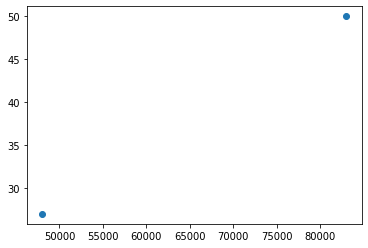

In [ ]:
x1=X[1,1:3] #row 2
x2=X[8,1:3] # row 9
print(x1)
print(x2)
x=[x1[1],x2[1]]
y=[x1[0],x2[0]]
plt.scatter(x, y)
plt.show()

In [ ]:
Agediff=(x1[0]-x2[0])**2
print(Agediff)
Saldiff=(x1[1]-x2[1])**2
print(Saldiff)
e_dist=np.sqrt(Agediff+Saldiff)
print(e_dist)

529.0
1225000000.0
35000.00755714204


Euclidean distance dominated by the salary if we do not apply feature scaling. The difference in Age contributes less to the overall difference
2 methods 
Standardisation (Z-score normalization) and Normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 1:3] = sc.fit_transform(X[:, 1:3])
print(X)



[['France' 0.7199314321591973 0.711012758872281]
 ['Spain' -1.6236751448696793 -1.3643758345927564]
 ['Germany' -1.2100975136292893 -0.845528686226497]
 ['Spain' -0.1072238303215827 -0.24020701313252774]
 ['Germany' 0.16849459050534396 nan]
 ['France' -0.5208014615619727 -0.4996305873156574]
 ['Spain' nan -1.0184777356819168]
 ['France' 1.2713682738130507 1.3163344319662502]
 ['Germany' 1.5470866946399773 1.6622325308770898]
 ['France' -0.24508304073504605 0.2786401352337316]]


Max-Min Normalization (Min-Max scaling). re-scales features with a distribution value between 0 and 1.
In contrast to standardisation, smaller standard deviations through the process of Max-Min Normalisation
It implies the data are more concentrated around the mean

if you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval, which means all features will have the same scale but does not handle outliers well. Standardisation is more robust to outliers, and in many cases, it is preferable over Max-Min Normalisation.

In [ ]:
X = dataset.iloc[:, :-1].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[:, 1:3])
X[:, 1:3] =scaler.transform(X[:, 1:3])
print(X)

[['France' 0.7391304347826089 0.6857142857142855]
 ['Spain' 0.0 0.0]
 ['Germany' 0.1304347826086958 0.17142857142857149]
 ['Spain' 0.4782608695652175 0.37142857142857144]
 ['Germany' 0.5652173913043479 nan]
 ['France' 0.34782608695652173 0.2857142857142856]
 ['Spain' nan 0.11428571428571432]
 ['France' 0.9130434782608696 0.8857142857142857]
 ['Germany' 1.0 1.0]
 ['France' 0.43478260869565233 0.5428571428571427]]
